<h1 align='center' style='background-color:yellow;'>Classification Assignment 2 - Naive Bayes</h1>

In [1]:
# Importing all necessary libraries and sklearn naive bayes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from tabulate import tabulate

In [2]:
# Read the dataset which is in cdv format and store it into variable
df_nb=pd.read_csv('liver_disease_1.csv')

In [3]:
# displaying top 5 records to check how the data format is
df_nb.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [4]:
# displaying descriptional statistics to get data insights
df_nb.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [5]:
# checking if there is any nullable columns
df_nb.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
# checking the count of nullable columns
df_nb.isnull().sum().sum()

4

In [7]:
# check if there is any duplicate rows. Since there is no id column, include all cols
df_nb[df_nb.duplicated(df_nb.columns[:-1])]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
19,40,0.9,0.3,293,232,245,6.8,3.1,0.80,Yes
26,34,4.1,2.0,289,875,731,5.0,2.7,1.10,Yes
34,38,2.6,1.2,410,59,57,5.6,3.0,0.80,No
55,42,8.9,4.5,272,31,61,5.8,2.0,0.50,Yes
62,58,1.0,0.5,158,37,43,7.2,3.6,1.00,Yes
106,36,5.3,2.3,145,32,92,5.1,2.6,1.00,No
108,36,0.8,0.2,158,29,39,6.0,2.2,0.50,No
138,18,0.8,0.2,282,72,140,5.5,2.5,0.80,Yes
143,30,1.6,0.4,332,84,139,5.6,2.7,0.90,Yes
158,72,0.7,0.1,196,20,35,5.8,2.0,0.50,Yes


In [8]:
df_nb[(df_nb['Age']==18)&(df_nb['Total_Bilirubin']==0.8)&(df_nb['Alkaline_Phosphotase']==282)]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
137,18,0.8,0.2,282,72,140,5.5,2.5,0.8,Yes
138,18,0.8,0.2,282,72,140,5.5,2.5,0.8,Yes


In [9]:
# drop duplicated rows by keeping first row and deleting other dupicated rows
df_nb.drop_duplicates(subset =df_nb.columns[:-1], keep = 'first', inplace = True) 

In [10]:
df_nb.shape

(570, 10)

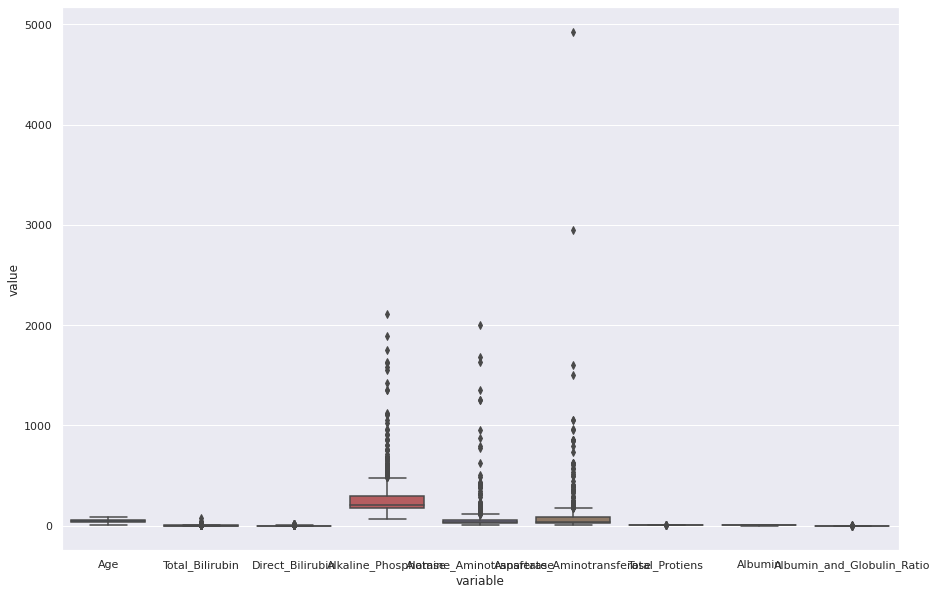

In [11]:
# plotting box plots to check if there is any outliers
plt.figure(figsize=(15,10))
melted_df = pd.melt(df_nb.drop('Dataset', axis=1))
sns.boxplot(x="variable", y="value", data=melted_df)

In [12]:
tmp = 700
display(df_nb[(df_nb['Alkaline_Phosphotase']>tmp)&(df_nb['Alamine_Aminotransferase']>tmp)&(df_nb['Aspartate_Aminotransferase']>tmp)])
tmpindex = df_nb[(df_nb['Alkaline_Phosphotase']>tmp)&(df_nb['Alamine_Aminotransferase']>tmp)&(df_nb['Aspartate_Aminotransferase']>tmp)].index
tmpindex

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
135,66,11.3,5.6,1110,1250,4929,7.0,2.4,0.5,Yes
199,7,27.2,11.8,1420,790,1050,6.1,2.0,0.4,Yes


Int64Index([135, 199], dtype='int64')

In [13]:
# dropping outlier rows
df_nb.drop(tmpindex, inplace=True)

In [14]:
df_nb.shape

(568, 10)

In [15]:
# Splitting the dataset into inputs and output columns
X, y = df_nb.iloc[:, :-1], df_nb.iloc[:, -1]

In [16]:
# Instead of fillling Nan with mean/median, using IterativeImputer which is based on all columns 
# to generate inputed value
imp = IterativeImputer(max_iter=15, verbose=0)
#imp = KNNImputer(n_neighbors=3, weights="uniform")
imp.fit(X)
X = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

In [17]:
#X.loc[X.index.isin([209,241,253,312]), ['Albumin_and_Globulin_Ratio']] = 0.93

In [18]:
X[X.index.isin(df_nb[df_nb['Albumin_and_Globulin_Ratio'].isna()].index)]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
209,70.0,1.7,0.5,400.0,56.0,44.0,5.7,3.1,1.1
241,50.0,0.9,0.3,901.0,23.0,17.0,6.2,3.5,1.2
253,40.0,14.5,6.4,358.0,50.0,75.0,5.7,2.1,0.5
312,24.0,3.3,1.6,174.0,11.0,33.0,7.6,3.9,1.0


In [19]:
# Scaling the features by using min max scaling
minmax_scale = preprocessing.MinMaxScaler().fit(X.iloc[:,:])
X.iloc[:,:] = minmax_scale.transform(X.iloc[:,:])

In [20]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.002725,0.594203,0.521739,0.240
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.030654,0.695652,0.500000,0.176
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.019755,0.623188,0.521739,0.236
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.003406,0.594203,0.543478,0.280
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.016689,0.666667,0.326087,0.040


In [21]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=0)

In [22]:
# Initializing Gaussian Naive Bayes Algorithm ad fitting the train dataset
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [23]:
# calculating confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[47,  2],
       [74, 48]])

In [24]:
# Calculating various metrics and displaying
gauss_score = gnb.score(X_train, y_train)
gauss_score_test = gnb.score(X_test, y_test)
gauss_accuracy = accuracy_score(y_test, y_pred)
gauss_cm = confusion_matrix(y_test,y_pred)
gauss_report = classification_report(y_test,y_pred)
print('Gaussian Train Score: ', gauss_score)
print('Gaussian Test Score: ', gauss_score_test)
print('Accuracy: ', gauss_accuracy)
print(gauss_cm)
print(gauss_report)

Gaussian Train Score:  0.5944584382871536
Gaussian Test Score:  0.5555555555555556
Accuracy:  0.5555555555555556
[[47  2]
 [74 48]]
              precision    recall  f1-score   support

          No       0.39      0.96      0.55        49
         Yes       0.96      0.39      0.56       122

    accuracy                           0.56       171
   macro avg       0.67      0.68      0.56       171
weighted avg       0.80      0.56      0.56       171



<h1 align='center' style='background-color:yellow;'>Classification Assignment 2 - Logistic Regression</h1>

In [25]:
# Importing all necessary libraries and sklearn naive bayes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

In [26]:
# Read the dataset which is in cdv format and store it into variable
df_logit=pd.read_csv('liver_disease_1.csv')

In [27]:
# drop duplicated rows by keeping first row and deleting other dupicated rows
df_logit.drop_duplicates(subset =df_logit.columns[:-1], keep = 'first', inplace = True) 

In [28]:
tmp = 700
display(df_logit[(df_logit['Alkaline_Phosphotase']>tmp)&(df_logit['Alamine_Aminotransferase']>tmp)&(df_logit['Aspartate_Aminotransferase']>tmp)])
tmpindex = df_logit[(df_logit['Alkaline_Phosphotase']>tmp)&(df_logit['Alamine_Aminotransferase']>tmp)&(df_logit['Aspartate_Aminotransferase']>tmp)].index
tmpindex

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
135,66,11.3,5.6,1110,1250,4929,7.0,2.4,0.5,Yes
199,7,27.2,11.8,1420,790,1050,6.1,2.0,0.4,Yes


Int64Index([135, 199], dtype='int64')

In [29]:
# dropping outlier rows
df_logit.drop(tmpindex, inplace=True)

In [30]:
# Splitting the dataset into inputs and output columns
X, y = df_logit.iloc[:, :-1], df_logit.iloc[:, -1]

In [31]:
# Instead of fillling Nan with mean/median, using IterativeImputer which is based on all columns 
# to generate inputed value
imp = IterativeImputer(max_iter=15, verbose=0)
#imp = KNNImputer(n_neighbors=3, weights="uniform")
imp.fit(X)
X = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

In [32]:
# Scaling the features by using min max scaling
minmax_scale = preprocessing.MinMaxScaler().fit(X.iloc[:,:])
X.iloc[:,:] = minmax_scale.transform(X.iloc[:,:])

In [33]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=0)

In [34]:
# Initializing Gaussian Naive Bayes Algorithm ad fitting the train dataset
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [35]:
# calculating confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  1,  48],
       [  1, 121]])

In [36]:
# Calculating various metrics and displaying
logreg_score = logreg.score(X_train, y_train)
logreg_score_test = logreg.score(X_test, y_test)
logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_cm = confusion_matrix(y_test,y_pred)
logreg_report = classification_report(y_test,y_pred)
print('Gaussian Train Score: ', logreg_score)
print('Gaussian Test Score: ', logreg_score_test)
print('Accuracy: ', logreg_accuracy)
print(logreg_cm)
print(logreg_report)

Gaussian Train Score:  0.7103274559193955
Gaussian Test Score:  0.7134502923976608
Accuracy:  0.7134502923976608
[[  1  48]
 [  1 121]]
              precision    recall  f1-score   support

          No       0.50      0.02      0.04        49
         Yes       0.72      0.99      0.83       122

    accuracy                           0.71       171
   macro avg       0.61      0.51      0.44       171
weighted avg       0.65      0.71      0.60       171



<h1 align='center' style='background-color:yellow;'>Conclusion</h1>

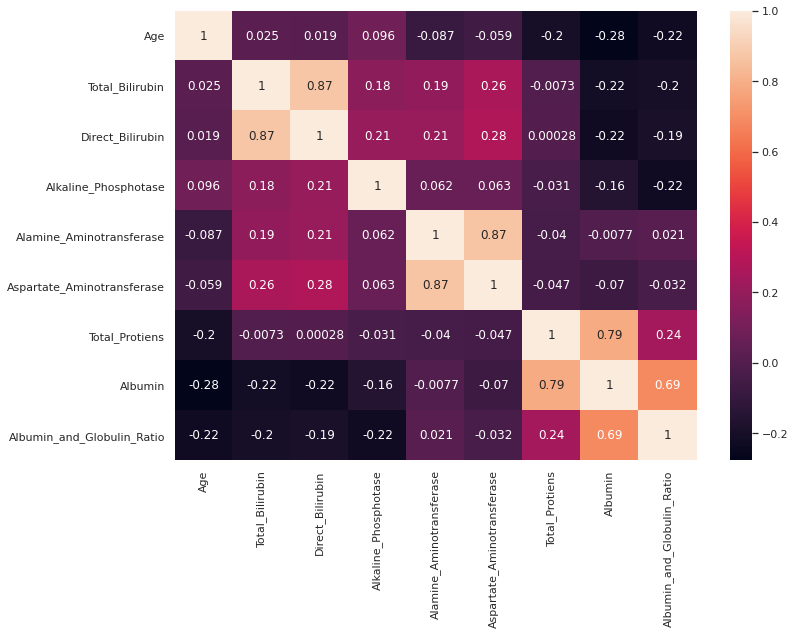

In [37]:
# displaying the relationship between columns
sns.heatmap(X.corr(), annot=True)

<h3 align='center' style='background-color:yellow;'>Comparing Metrics</h3> 

In [38]:
table =[['Train Score', gauss_score, logreg_score],['Test Score', gauss_score_test, logreg_score_test],
       ['Accuracy', gauss_accuracy, logreg_accuracy],['Confusion Matrix',gauss_cm, logreg_cm]]
print(tabulate(table, headers=["Metrics", "Naive Bayes", "Logistic Regression"],tablefmt="fancy_grid"))

╒══════════════════╤════════════════════╤═══════════════════════╕
│ Metrics          │ Naive Bayes        │ Logistic Regression   │
╞══════════════════╪════════════════════╪═══════════════════════╡
│ Train Score      │ 0.5944584382871536 │ 0.7103274559193955    │
├──────────────────┼────────────────────┼───────────────────────┤
│ Test Score       │ 0.5555555555555556 │ 0.7134502923976608    │
├──────────────────┼────────────────────┼───────────────────────┤
│ Accuracy         │ 0.5555555555555556 │ 0.7134502923976608    │
├──────────────────┼────────────────────┼───────────────────────┤
│ Confusion Matrix │ [[47  2]           │ [[  1  48]            │
│                  │  [74 48]]          │  [  1 121]]           │
╘══════════════════╧════════════════════╧═══════════════════════╛


In [39]:
table =[['Classification Report - Row1 (Naive Bayes), Row2 (Logistic Regression)'],[gauss_report],[logreg_report]]
print(tabulate(table,tablefmt="fancy_grid"))

╒════════════════════════════════════════════════════════════════════════╕
│ Classification Report - Row1 (Naive Bayes), Row2 (Logistic Regression) │
├────────────────────────────────────────────────────────────────────────┤
│ precision    recall  f1-score   support                                │
│                                                                        │
│           No       0.39      0.96      0.55        49                  │
│          Yes       0.96      0.39      0.56       122                  │
│                                                                        │
│     accuracy                           0.56       171                  │
│    macro avg       0.67      0.68      0.56       171                  │
│ weighted avg       0.80      0.56      0.56       171                  │
├────────────────────────────────────────────────────────────────────────┤
│ precision    recall  f1-score   support                                │
│                        

<h3 align='center' style='background-color:yellow;'>Inferences</h3> 

<p style="font-weight:bold;">
Naive Bayes classifier is the generative model and logistic regression is the discriminative model.
Naive Bayes assumes that the features are conditionally independent. Here some of the columns like (Total_Bilirubin and Direct_Bilirubin), (Alamine_Aminotransferase and Aspartate_Aminotransferase) are highly correlated. Hence the Naive Bayes predictions might be poor when compared to Logistic Regression. So using Logic Regression Algorithm will be the right approach for this dataset.
</p>

In [40]:
print('END OF NOTEBOOK')

END OF NOTEBOOK
